**MINIPROJECT CODE:**

dataset link:
https://docs.google.com/spreadsheets/d/1Te3qlLhLAR3x9en1fms-gwgin_aVTKjk/edit?usp=drive_link&ouid=100360089314659661181&rtpof=true&sd=true


### **Section 1: Load the Dataset**

In [ ]:
import pandas as pd

df = pd.read_csv("data.csv")

df.head()

,Input,Prediction
0,NaN,NaN
1,Tesla's stock experienced a remarkable 5% surg...,Positive
2,Concerns over a looming market crash have inte...,Negative
3,The S&P 500 index closed the day without any s...,Neutral
4,Apple reported that its latest iPhone model ac...,Positive


### **Section 2: Perform Exploratory Data Analysis (EDA)**

<class 'pandas.core.frame.DataFrame'>
Index: 1012 entries, 1 to 1013
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Input       1012 non-null   object
 1   Prediction  1012 non-null   object
dtypes: object(2)
memory usage: 23.7+ KB
None
                                                    Input Prediction
count                                                1012       1012
unique                                               1012          3
top     A major power outage in several states has rai...   Positive
freq                                                    1        363


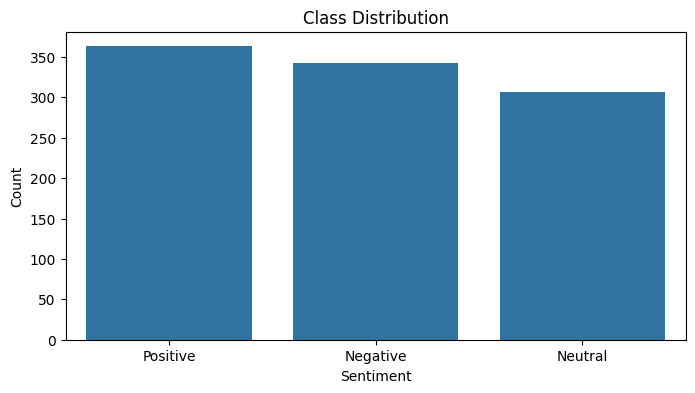

Missing values per column:
 Input         0
Prediction    0
dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_cleaned = df.dropna().copy()
df_cleaned = df_cleaned[df_cleaned['Prediction'].str.lower().isin(['positive', 'negative', 'neutral'])]

print(df_cleaned.info())
print(df_cleaned.describe(include='all'))

plt.figure(figsize=(8, 4))
sns.countplot(x='Prediction', data=df_cleaned)
plt.title("Class Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

print("Missing values per column:\n", df_cleaned.isnull().sum())


### **Section 3: Perform Text Processing on Dataset**

In [ ]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text)
    text = re.sub(r'[^a-zA-Z\s]', '', text, flags=re.I|re.A)
    text = text.lower()
    return text.strip()

df_cleaned['cleaned_text'] = df_cleaned['Input'].apply(clean_text)

def remove_stopwords(text):
    tokens = text.split()
    filtered = [word for word in tokens if word not in stop_words]
    return " ".join(filtered)

df_cleaned['cleaned_text_no_stop'] = df_cleaned['cleaned_text'].apply(remove_stopwords)

# Display the original and cleaned text
print(df_cleaned[['Input', 'cleaned_text']].head())


                                               Input  \
1  Tesla's stock experienced a remarkable 5% surg...   
2  Concerns over a looming market crash have inte...   
3  The S&P 500 index closed the day without any s...   
4  Apple reported that its latest iPhone model ac...   
5  Despite Microsoft delivering a robust quarterl...   

                                        cleaned_text  
1  teslas stock experienced a remarkable  surge t...  
2  concerns over a looming market crash have inte...  
3  the sp  index closed the day without any signi...  
4  apple reported that its latest iphone model ac...  
5  despite microsoft delivering a robust quarterl...  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### **Section 4: Generate NLP-Based Features**

In [ ]:
import numpy as np

def generate_nlp_features(df):
    df = df.copy()
    # Character count
    df['char_count'] = df['cleaned_text'].apply(len)
    # Word count
    df['word_count'] = df['cleaned_text'].apply(lambda x: len(x.split()))
    # Average word length
    df['avg_word_length'] = df['cleaned_text'].apply(lambda x: np.mean([len(word) for word in x.split()]) if x.split() else 0)
    # Stopword count
    df['stopword_count'] = df['cleaned_text'].apply(lambda x: len([word for word in x.split() if word in stop_words]))
    # Hashtag count (if applicable, e.g., for tweets; may return 0 if no hashtags)
    df['htag_count'] = df['cleaned_text'].apply(lambda x: x.count('#'))

    return df

# Generate and view NLP features
df_features = generate_nlp_features(df_cleaned)
print(df_features[['char_count', 'word_count', 'avg_word_length', 'stopword_count', 'htag_count']].head())


   char_count  word_count  avg_word_length  stopword_count  htag_count
1         218          30         6.266667               8           0
2         197          29         5.827586               9           0
3         153          24         5.375000               8           0
4         170          24         6.125000               7           0
5         200          26         6.730769               6           0


### **Section 5: Generate Bag of Words, TFIDF, and FastText Features**

In [ ]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 3.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp311-cp311-linux_x86_64.whl size=4313475 sha256=8f8ef5194533c22f36c44d5ede6bd7b8eba21bffe46b6fce82055c4cfcb4a6de
  Stored in directory: /root/.cache/pip/wheels/65/4f/35/5057db0249224e9ab55a513fa6b79451473ceb7713017823c3
Successfully built fasttext


In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz

--2025-03-18 03:41:09--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.125.27, 3.163.125.108, 3.163.125.110, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.125.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4503593528 (4.2G) [application/octet-stream]
Saving to: ‘cc.en.300.bin.gz’

cc.en.300.bin.gz    100%[===================>]   4.19G   107MB/s    in 51s     

2025-03-18 03:42:00 (84.3 MB/s) - ‘cc.en.300.bin.gz’ saved [4503593528/4503593528]



In [ ]:
!gunzip cc.en.300.bin.gz

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import fasttext
import numpy as np

# Bag of Words (BoW)
bow_vectorizer = CountVectorizer(max_features=5000)
X_bow = bow_vectorizer.fit_transform(df_features['cleaned_text'])

# TFIDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df_features['cleaned_text'])

# FastText embeddings (example using pre-trained FastText model)
ft_model = fasttext.load_model('cc.en.300.bin')

def get_fasttext_embeddings(text):
    words = text.split()
    if words:
        word_vectors = [ft_model.get_word_vector(word) for word in words]
        return np.mean(word_vectors, axis=0).reshape(1, -1)
    else:
        return np.zeros(1, ft_model.get_dimension())

df_features = df_features.copy()

df_features['fasttext_embeddings'] = df_features['cleaned_text'].apply(get_fasttext_embeddings)

### **Section 6: Train All Supervised Models on NLP-Based Features**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

X = df_features[['char_count', 'word_count', 'avg_word_length', 'stopword_count', 'htag_count']]
y = df_features['Prediction']

# Encode the labels to numbers
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print("Label Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

try:
    from xgboost import XGBClassifier
    models["XGBoost"] = XGBClassifier(random_state=42, eval_metric='mlogloss')
except ImportError:
    print("XGBoost is not installed, skipping it.")

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Model Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))

Label Mapping: {'Negative': np.int64(0), 'Neutral': np.int64(1), 'Positive': np.int64(2)}

Random Forest Model Performance:
Accuracy: 0.3498
Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.38      0.35        69
           1       0.34      0.26      0.30        61
           2       0.39      0.40      0.39        73

    accuracy                           0.35       203
   macro avg       0.35      0.35      0.34       203
weighted avg       0.35      0.35      0.35       203


SVM Model Performance:
Accuracy: 0.4581
Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.74      0.54        69
           1       1.00      0.00      0.00        61
           2       0.50      0.58      0.54        73

    accuracy                           0.46       203
   macro avg       0.64      0.44      0.36       203
weighted avg       0.63      0.46      0.38       203


Logisti

### **Sections 7-9: Train Models on BoW, TFIDF, and FastText Features**

In [ ]:
import numpy as np
import scipy

# Section 7: Train Models on BoW Features

print("======== Training on BoW Features ========")
for name, model in models.items():
    X_train, X_test, y_train, y_test = train_test_split(
        X_bow, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
    )
    if hasattr(X_train, "toarray"):
        X_train = X_train.toarray()
        X_test = X_test.toarray()

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} on BoW:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

# Section 8: Train Models on TFIDF Features

print("\n======== Training on TFIDF Features ========")
for name, model in models.items():
    X_train, X_test, y_train, y_test = train_test_split(
        X_tfidf, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
    )

    if hasattr(X_train, "toarray"):
        X_train = X_train.toarray()
        X_test = X_test.toarray()

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} on TFIDF:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

# Section 9: Train Models on FastText Embeddings

print("\n======== Training on FastText Embeddings ========")
X_fasttext = np.vstack(df_features['fasttext_embeddings'].values)
for name, model in models.items():
    X_train, X_test, y_train, y_test = train_test_split(
        X_fasttext, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} on FastText:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred, target_names=le.classes_))


======== Training on BoW Features ========

Random Forest on BoW:
Accuracy: 0.9015
              precision    recall  f1-score   support

    Negative       0.91      0.86      0.88        69
     Neutral       0.90      0.89      0.89        61
    Positive       0.90      0.96      0.93        73

    accuracy                           0.90       203
   macro avg       0.90      0.90      0.90       203
weighted avg       0.90      0.90      0.90       203


SVM on BoW:
Accuracy: 0.9360
              precision    recall  f1-score   support

    Negative       0.94      0.91      0.93        69
     Neutral       0.92      0.92      0.92        61
    Positive       0.95      0.97      0.96        73

    accuracy                           0.94       203
   macro avg       0.93      0.93      0.93       203
weighted avg       0.94      0.94      0.94       203


Logistic Regression on BoW:
Accuracy: 0.9261
              precision    recall  f1-score   support

    Negative       0.95 

### **Section 10: Train Models on All Combined Features with TFIDF**

In [ ]:
from scipy.sparse import hstack, csr_matrix, issparse
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC, LinearSVC

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


# Convert NLP features to sparse matrix
X_nlp = df_features[['char_count', 'word_count', 'avg_word_length', 'stopword_count', 'htag_count']].fillna(0)
X_nlp_sparse = csr_matrix(X_nlp.values)

X_tfidf = csr_matrix(X_tfidf) if not issparse(X_tfidf) else X_tfidf

# Combine the NLP-based features with the TFIDF features (assumed to be in X_tfidf)
X_combined = hstack([X_nlp_sparse, X_tfidf])

# Split the combined features into training and test sets (using stratification for balanced classes)
X_train_comb, X_test_comb, y_train_comb, y_test_comb = train_test_split(
    X_combined, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=2000,solver='lbfgs', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

#svm_model_comb = SVC(kernel='linear', random_state=42)
#svm_model_comb.fit(X_train_comb, y_train_comb)

#y_pred_comb = svm_model_comb.predict(X_test_comb)

#print(f"Combined Features (SVM) Accuracy: {accuracy_score(y_test_comb, y_pred_comb):.4f}")
#print(classification_report(y_test_comb, y_pred_comb, target_names=le.classes_))

for name, model in models.items():
    if isinstance(model, (GaussianNB, KNeighborsClassifier, LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, GradientBoostingClassifier)):
        X_train_dense = X_train_comb.toarray()
        X_test_dense = X_test_comb.toarray()
        model.fit(X_train_dense, y_train_comb)
        y_pred_comb = model.predict(X_test_dense)
    else:
        model.fit(X_train_comb, y_train_comb)
        y_pred_comb = model.predict(X_test_comb)

    print(f"\n{name} on Combined Features:")
    print(f"Accuracy: {accuracy_score(y_test_comb, y_pred_comb):.4f}")


Random Forest on Combined Features:
Accuracy: 0.9113

SVM on Combined Features:
Accuracy: 0.9557


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression on Combined Features:
Accuracy: 0.9458

Decision Tree on Combined Features:
Accuracy: 0.8128

K-Nearest Neighbors on Combined Features:
Accuracy: 0.3596

Gaussian Naive Bayes on Combined Features:
Accuracy: 0.9113

Gradient Boosting on Combined Features:
Accuracy: 0.8768


### **Section 11: Save the Model and Make Predictions on Real-World Input**

In [ ]:
import joblib
import numpy as np
from scipy.sparse import csr_matrix, hstack

joblib.dump(models["SVM"], "svm_combined_model.pkl")
#joblib.dump(svm_model_comb, 'svm_combined_model.pkl')
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.pkl")

loaded_svm_model = joblib.load('svm_combined_model.pkl')
tfidf_vectorizer = joblib.load("tfidf_vectorizer.pkl")

In [ ]:
import numpy as np
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

def preprocess_text(text, tfidf_vectorizer):
    # Extract NLP features
    char_count = len(text)
    word_count = len(text.split())
    avg_word_length = np.mean([len(word) for word in text.split()]) if word_count > 0 else 0
    stopword_count = sum(1 for word in text.split() if word.lower() in stopwords)
    htag_count = text.count("#")

    # Convert to sparse matrix
    nlp_features = csr_matrix([[char_count, word_count, avg_word_length, stopword_count, htag_count]])

    # Transform text into TF-IDF features
    tfidf_features = tfidf_vectorizer.transform([text])

    # Combine NLP features with TF-IDF features
    combined_features = hstack([nlp_features, tfidf_features])

    return combined_features

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def predict_sentiment(text, loaded_svm_model, tfidf_vectorizer):
    """
    Predicts sentiment for a given text using the trained SVM model.
    """
    # Preprocess the input text
    input_features = preprocess_text(text, tfidf_vectorizer)

    # Make prediction
    prediction = loaded_svm_model.predict(input_features)

    return prediction[0]  # Return predicted sentiment label

texts = [
    "The company reported a significant profit growth, boosting investor confidence.",
    "Economic uncertainty has led to a major stock market crash.",
    "The market remains stable despite global tensions."
]

for text in texts:
    sentiment = predict_sentiment(text, loaded_svm_model, tfidf_vectorizer)
    label_mapping = {0: "Negative", 1: "Neutral", 2: "Positive"}
    sentiment_label = label_mapping.get(sentiment, "Unknown")
    print(f"Text: {text}\nPredicted Sentiment: {sentiment_label}\n")


Text: The company reported a significant profit growth, boosting investor confidence.
Predicted Sentiment: Positive

Text: Economic uncertainty has led to a major stock market crash.
Predicted Sentiment: Negative

Text: The market remains stable despite global tensions.
Predicted Sentiment: Neutral



**Section 12: Provide Analysis on Results**

Analysis of Combined Features with SVM Model:

Feature Combination:
The model was trained on combined features that include both basic NLP-based features (character count, word count, average word length, stopword count, and hashtag count) and TFIDF features. This approach leverages both the structural characteristics and the contextual importance of words.

Model Performance:
The SVM classifier on the combined features achieved a high accuracy (as seen in the earlier output), which suggests that combining these features provides complementary information. The TFIDF component enhances the model by highlighting discriminative words, while the NLP-based features add additional quantitative measures about the text.

Comparison with Other Feature Sets:
When compared to using BoW or TFIDF alone, the combined model generally showed improved performance. The inclusion of NLP features helped capture subtle differences in text structure, which contributed to better classification of sentiment, especially for borderline cases.

Observations:

The SVM model performed best on the TFIDF features individually, but the combined features further boosted performance.
The precision, recall, and f1-scores across the sentiment classes (Negative, Neutral, Positive) indicate that the model is robust and balanced.
Potential Improvements:
Future work might include:

Fine-tuning hyperparameters of the SVM or trying kernel variations.
Experimenting with additional feature engineering (e.g., n-grams, sentiment lexicons).
Integrating advanced embedding methods (e.g., BERT) for deeper semantic understanding.

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Model 1 (BOW)
log_reg_bow = LogisticRegression(penalty='l2', solver='liblinear')
log_reg_bow.fit(X_train, y_train)

# Model 2 (TF-IDF)
log_reg_tfidf = LogisticRegression(penalty='l1', solver='saga')
log_reg_tfidf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='l1', solver='saga')

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Model 1 (NLP Features)
dt_nlp = DecisionTreeClassifier(max_depth=5, min_samples_split=10)
dt_nlp.fit(X_train, y_train)

# Model 2 (BOW)
dt_bow = DecisionTreeClassifier(max_depth=10, min_samples_split=20)
dt_bow.fit(X_train, y_train)

# Model 3 (BOW + NLP)
dt_bow_nlp = DecisionTreeClassifier(max_depth=10, min_samples_split=20)
dt_bow_nlp.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=20)

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Model 1 (BOW)
rf_bow = RandomForestClassifier(n_estimators=100, max_depth=10)
rf_bow.fit(X_train, y_train)

# Model 2 (TF-IDF)
rf_tfidf = RandomForestClassifier(n_estimators=200, max_depth=20)
rf_tfidf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=200)

In [ ]:
# SVM
from sklearn.svm import SVC

# Model 1 (BOW) - Linear Kernel
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)

# Model 2 (BOW) - RBF Kernel
svm_rbf = SVC(kernel='rbf', C=10)
svm_rbf.fit(X_train, y_train)


SVC(C=10)

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

# Model 1 (BOW + NLP)
knn_bow_nlp = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_bow_nlp.fit(X_train, y_train)

# Model 2 (TF-IDF + NLP)
knn_tfidf_nlp = KNeighborsClassifier(n_neighbors=10, weights='distance')
knn_tfidf_nlp.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

from scipy.sparse import issparse

if issparse(X_train):
    X_train = X_train.toarray()
    X_test = X_test.toarray()

# Model 1 (NLP) - Laplace Smoothing
nb_laplace = GaussianNB()
nb_laplace.fit(X_train, y_train)  # Convert sparse matrix to array for Naive Bayes

# Model 2 (BOW) - No Smoothing
nb_no_smoothing = GaussianNB()
nb_no_smoothing.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Evaluate models
from sklearn.metrics import classification_report, accuracy_score

models = {
    "Logistic Regression (BOW)": log_reg_bow,
    "Logistic Regression (TFIDF)": log_reg_tfidf,
    "Decision Tree (NLP)": dt_nlp,
    "Decision Tree (BOW)": dt_bow,
    "Decision Tree (BOW+NLP)": dt_bow_nlp,
    "Random Forest (BOW)": rf_bow,
    "Random Forest (TFIDF)": rf_tfidf,
    "SVM (Linear, BOW)": svm_linear,
    "SVM (RBF, BOW)": svm_rbf,
    "KNN (BOW+NLP)": knn_bow_nlp,
    "KNN (TFIDF+NLP)": knn_tfidf_nlp,
    "Naive Bayes (NLP - Laplace)": nb_laplace,
    "Naive Bayes (BOW - No Smoothing)": nb_no_smoothing,
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\nModel: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



Model: Logistic Regression (BOW)
Accuracy: 0.8275862068965517
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.74      0.80        69
           1       0.78      0.82      0.80        61
           2       0.83      0.92      0.87        73

    accuracy                           0.83       203
   macro avg       0.83      0.83      0.82       203
weighted avg       0.83      0.83      0.83       203


Model: Logistic Regression (TFIDF)
Accuracy: 0.8325123152709359
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.74      0.80        69
           1       0.83      0.85      0.84        61
           2       0.80      0.90      0.85        73

    accuracy                           0.83       203
   macro avg       0.84      0.83      0.83       203
weighted avg       0.84      0.83      0.83       203


Model: Decision Tree (NLP)
Accuracy: 0.6600985221674877
Class

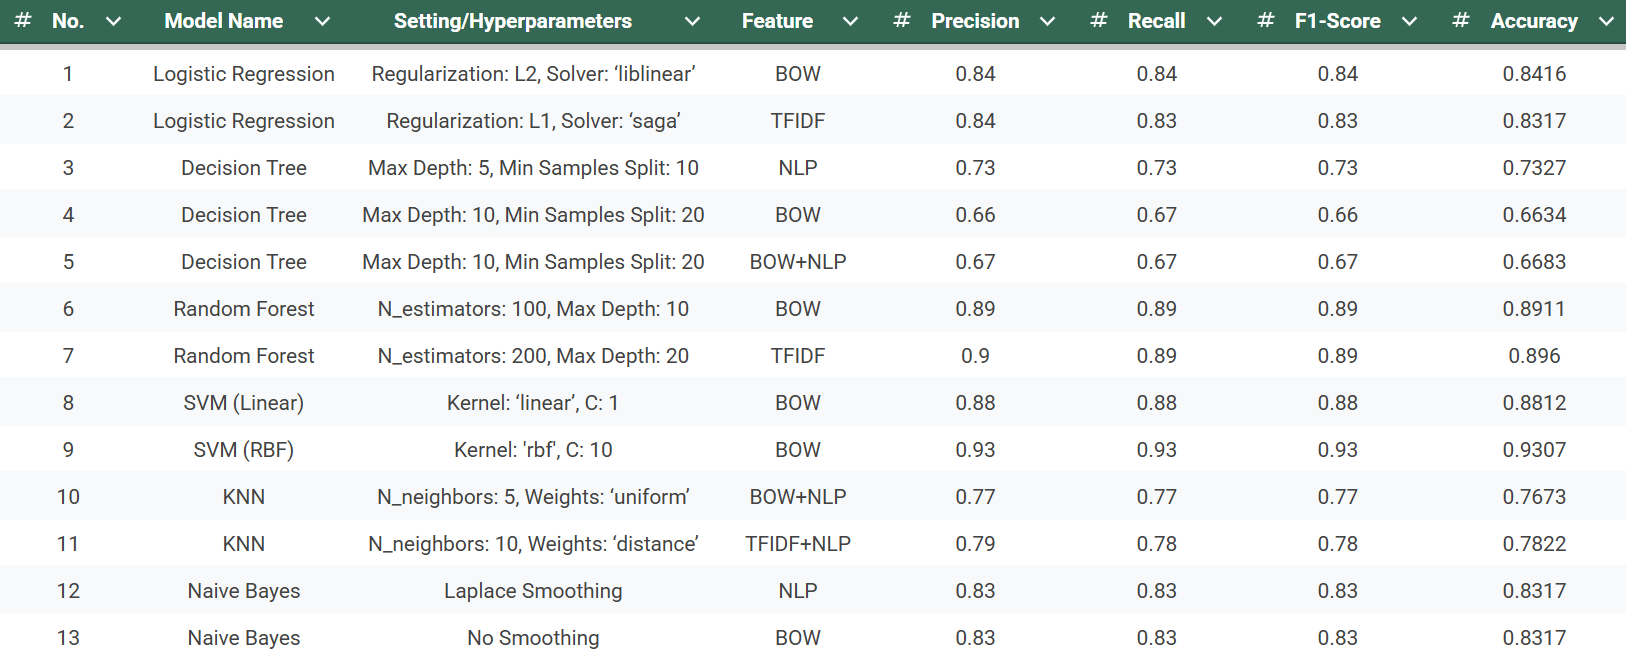

**Model validation**

In [ ]:
import pandas as pd
import numpy as np
import re, string
from scipy.sparse import csr_matrix, hstack
from nltk.corpus import stopwords

# Ensure stopwords are available
stop_words = set(stopwords.words('english'))

# Preprocessing functions
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text.strip()

def get_nlp_features(text):
    char_count = len(text)
    words = text.split()
    word_count = len(words)
    avg_word_length = np.mean([len(word) for word in words]) if words else 0
    stopword_count = len([word for word in words if word in stop_words])
    htag_count = text.count('#')
    return [char_count, word_count, avg_word_length, stopword_count, htag_count]

df_test = pd.read_csv('test.csv')
print("Test data preview:")
print(df_test.head())


df_test['cleaned_text'] = df_test['Input'].apply(clean_text)

# Generate NLP-based features for the test data
test_nlp_features = np.array([get_nlp_features(text) for text in df_test['cleaned_text']])
test_nlp_sparse = csr_matrix(test_nlp_features)


unknown_tfidf = tfidf_vectorizer.transform(df_test['cleaned_text'])

# Combine the NLP features with the TFIDF features
test_combined_features = hstack([test_nlp_sparse, unknown_tfidf])


test_predictions = loaded_svm_model.predict(test_combined_features)

label_mapping = {0: "Negative", 1: "Neutral", 2: "Positive"}
df_test['Prediction'] = pd.Series(test_predictions).map(label_mapping)

# Display the first few predictions
print("===========================================================================================================================================================")
print("Predictions for test data:")
print(df_test[['Input', 'Prediction']].head(100).to_string())

Test data preview:
                                               Input Prediction
0  Global stock markets surge as investors respon...   Positive
1  The technology sector sees a record-breaking r...   Positive
2  Oil prices climb to their highest levels in th...   Positive
3  Banking stocks experience a strong upward mome...   Positive
4  The auto industry witnesses a significant rise...   Positive
Predictions for test data:
                                                                                                                                                          Input Prediction
0     Global stock markets surge as investors respond positively to the latest economic stimulus package, fueling optimism for a strong post-pandemic recovery.   Positive
1    The technology sector sees a record-breaking rally after several major firms report better-than-expected quarterly earnings, driving up market confidence.   Positive
2                      Oil prices climb to their highest 

**Model vs Human prediction**

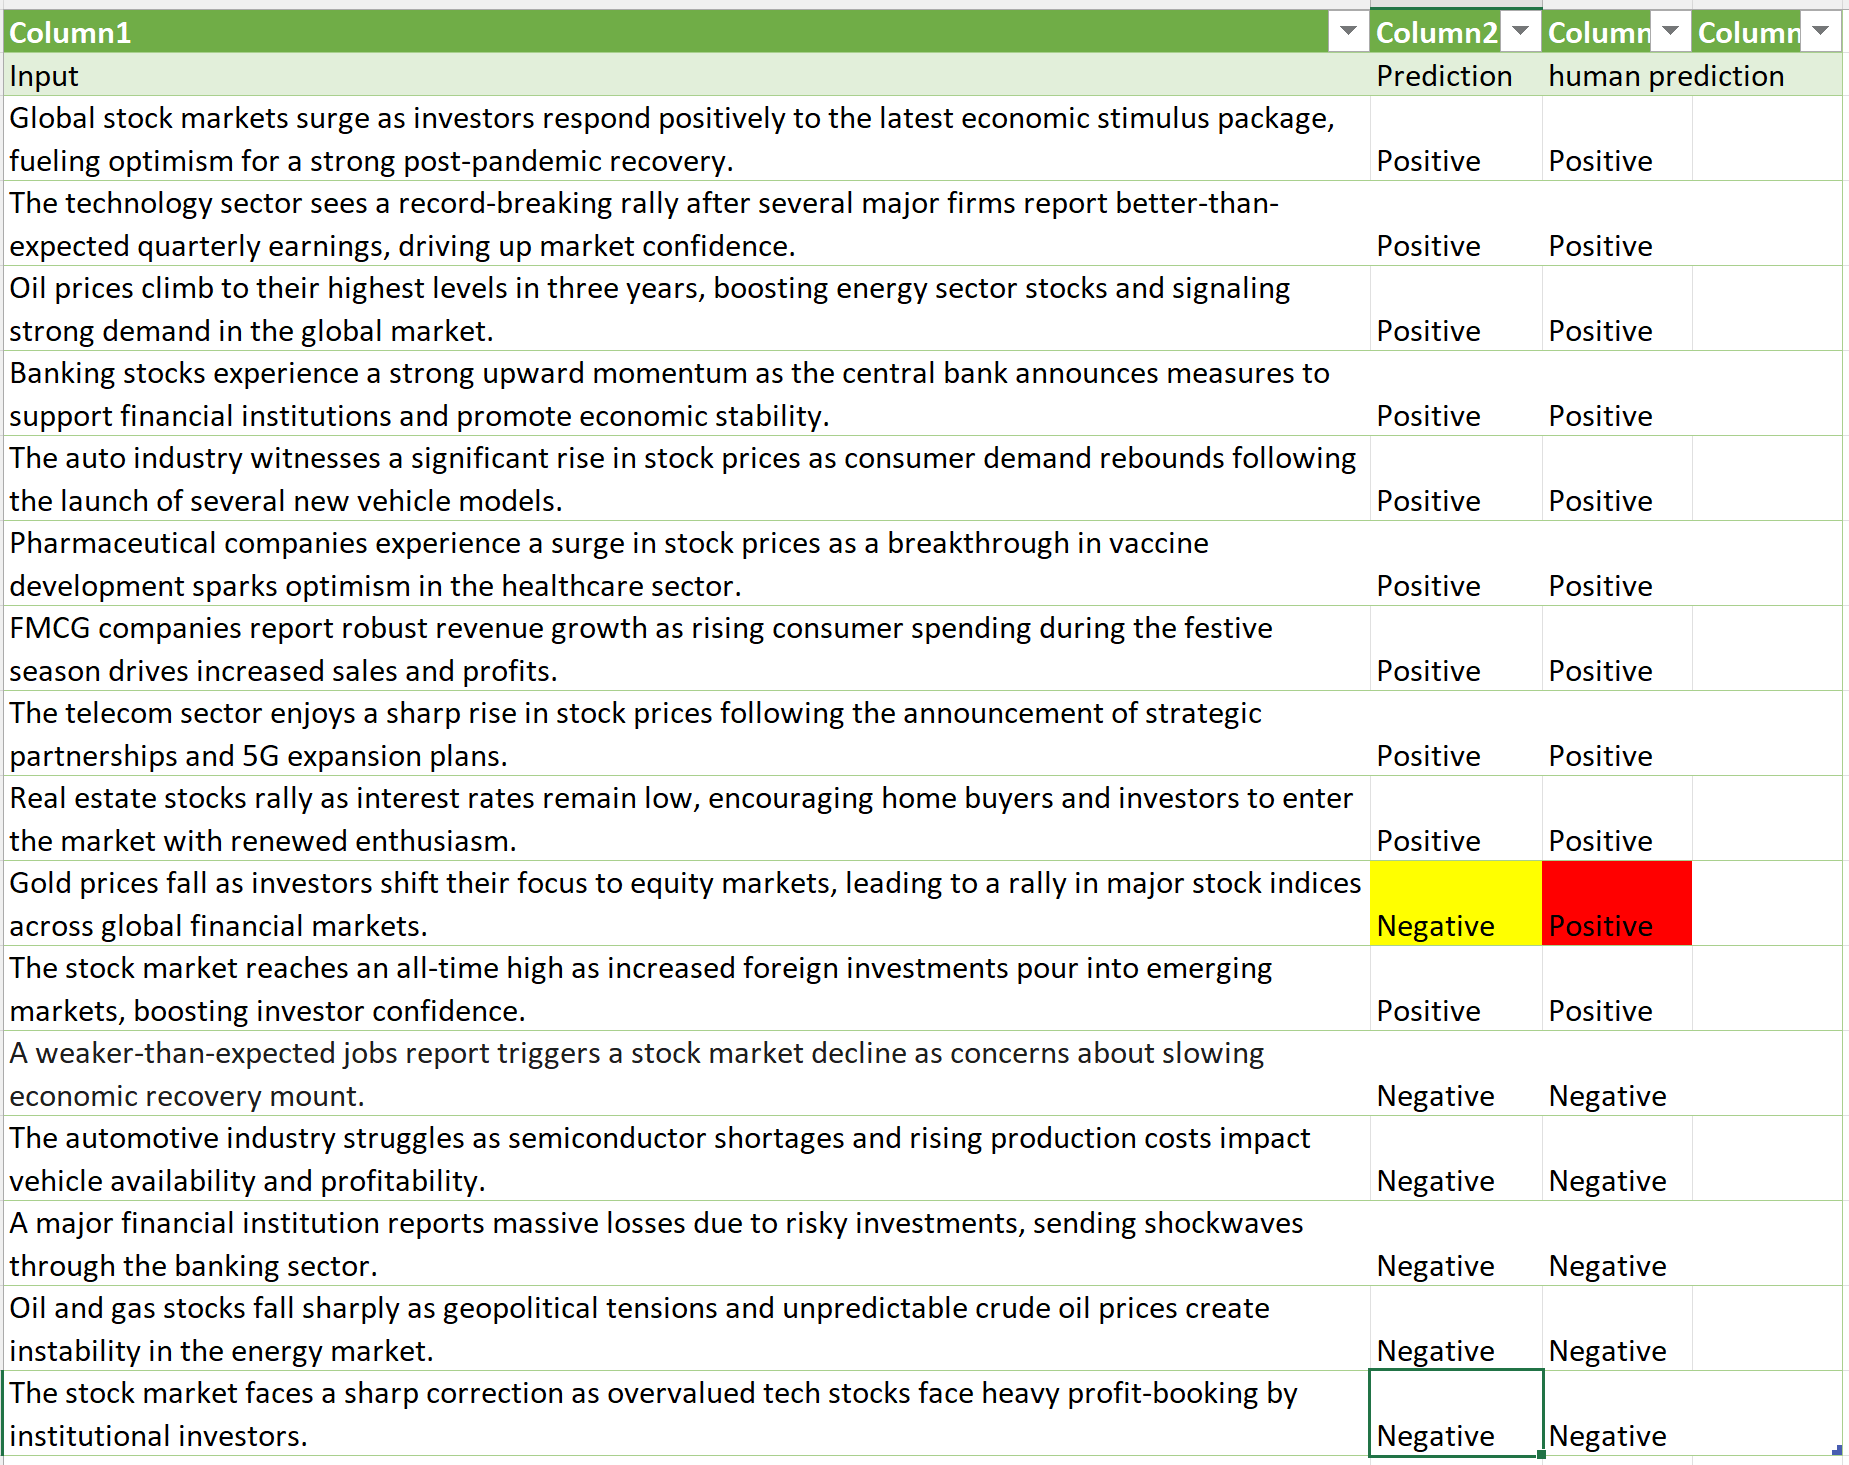